In [1]:
# This code analyzes the simulation results in ../outputs/mbona1/ and ../outputs/mbona1_noAPL/  folders and plots Figure 5 and Supplementary Figure 10.

In [2]:
import pickle
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import statistics
import math
from matplotlib.ticker import ScalarFormatter
import numpy as np
import datetime
import pandas as pd
cmap = plt.get_cmap("tab10")

In [3]:
def readdata(filename):
    f = open(filename,"rb")
    gw0 = pickle.load(f)
    return gw0
folder="../outputs/MBONa1/"
MBONa3=readdata(folder+"MBON0.txt")
MBONa1=readdata(folder+"MBON1.txt")
APL_v=readdata(folder+"APL_v.txt")
APL_s=readdata(folder+"APL_s.txt")
folder2="../outputs/MBONa1_noAPL/"
MBONa1_noAPL=readdata(folder2+"MBON1.txt")

In [4]:
P=6
duration=5
iteration=5
epoch=2
homeostasis_duration=300

In [5]:
P=6
w0=50
k0=0
def print_txt(l0,f0):
    with open(f0, "w") as f:
        for item in l0:
            f.write("%s\n" % item)
def print_line(line,name,n=0):
    v0=0
    v1=0
    v2=0
    f0=0
    c0=100
    st0=[]
    line2=[]
    w=10
    for j,x in enumerate(line):
        vmax=-0
        if j>w/2 and j<len(line)-w/2:
            vmax=-100
            for k in range(w):
                if line[int(j-w/2+k)]>vmax:
                    vmax=line[int(j-w/2+k)]
        line2.append(vmax)
    for j,x in enumerate(line):
        v2=v1
        v1=v0
        v0=x
        if c0>=1:
            c0=c0-1
        if j>0:
            if  v1==line2[j-1] and x>-1.5 and c0==0 and j>10 and j<len(line)-5:
                c0=3
                st0.append(j*0.001)
                f0=0
    st1=[]
    plt.figure(figsize=(5,1.5))  
    for j in range(len(st0)):
        st1.append(1.0)
    plt.scatter(st0,st1,color="black",s=2)
    plt.plot(np.arange(0, 2, 2.0/len(line)),line,label="model")
    plt.xlim(0,2)
    plt.ylim(-2.4,1.2)
    plt.legend(loc='upper left')
    plt.xticks(np.arange(0, 2, 0.5))
    plt.show()
    plt.figure(figsize=(5,1.5))
    fx=[]
    fy=[]
    for i in range(int(len(line)/w0)):
        c0=0
        for t in st0:
            if t*1000>i*w0-w0 and t*1000<i*w0+w0:
                c0+=1
        fx.append(i*w0*0.001)
        fy.append(c0*(1000/w0/2))
    plt.plot(fx,fy,color="black")
    plt.xlim(0,2)
    plt.xticks(np.arange(0, 2, 0.5))
    plt.show()
    return fx,fy,st0,st1,line


299.5 301.5 0


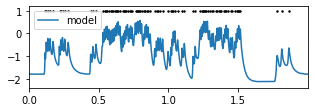

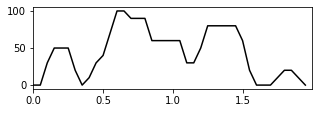

329.5 331.5 1


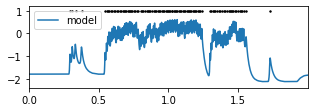

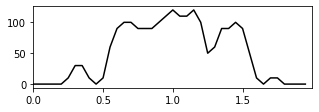

359.5 361.5 2


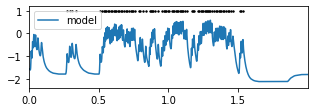

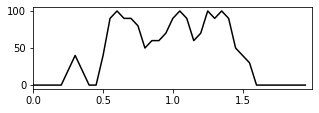

389.5 391.5 3


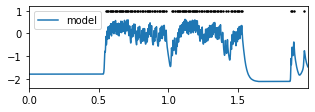

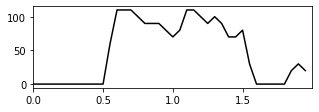

419.5 421.5 4


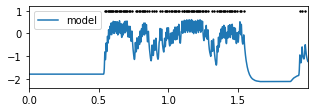

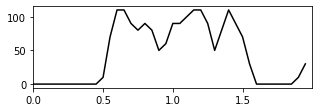

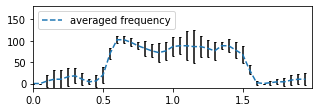

449.5 451.5 0


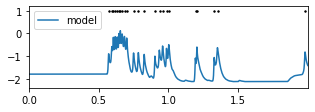

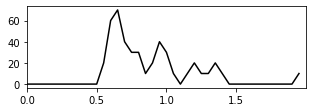

479.5 481.5 1


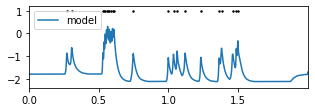

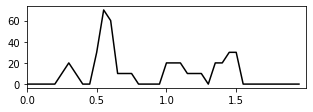

509.5 511.5 2


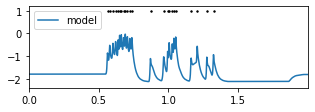

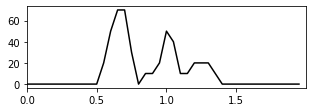

539.5 541.5 3


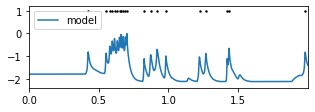

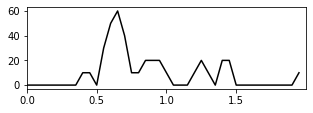

569.5 571.5 4


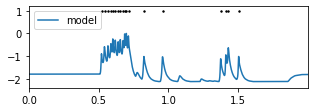

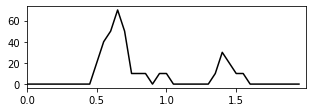

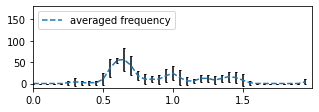

In [6]:
def print_freq(start,num,name,index):
    k0=0
    linewidth=2000
    a=np.zeros((num,int(linewidth/w0)))
    m_w=[]
    m_w_dot_x=[]
    m_w_dot_y=[]
    for k in range(num):
        xlim_start=start+k*P*5
        xlim_end=xlim_start+2
        print(xlim_start,xlim_end,k)
        fx, fy, st0,st1,line=print_line(MBONa1[int(xlim_start*1000):int(xlim_end*1000)],name,n=k)
        for i in range(int(linewidth/w0)):
            a[k][i]=fy[i]
        if k==index:
            m_w=line
            m_w_dot_x=st0
            m_w_dot_y=st1
        print_txt(line,"../outputs/FigSourceData/Fig5"+name+str(k)+".txt")
    print_txt(np.arange(0, 2, 2.0/len(line)),"../outputs/FigSourceData/Fig5"+name+"t"+".txt")
    plt.figure(figsize=(5,1.5))
    a0=np.zeros(int(linewidth/w0))
    a1=np.zeros(int(linewidth/w0))
    for i in range(int(linewidth/w0)):
        b0=[]
        for k in range(num):
            a0[i]+=a[k][i]/num
        a1[i]=statistics.stdev(a.T[i])
    plt.plot(fx,a0,linestyle="dashed",label="averaged frequency")
    plt.errorbar(fx,a0, yerr=a1,fmt='none',ecolor='black',capsize=1)
    plt.xlim(0,2)
    plt.ylim(-10,180)
    plt.xticks(np.arange(0, 2, 0.5))
    plt.legend(loc='upper left')
    plt.show()
    m_f_ave=a0
    m_f_ave_err=a1
    return m_w,m_w_dot_x,m_w_dot_y,m_f_ave,m_f_ave_err
m_pre_w,m_pre_w_dot_x,m_pre_w_dot_y,m_pre_f_ave,m_pre_f_ave_err=print_freq(homeostasis_duration-0.5,iteration,"insilicoPre",4)
m_post_w,m_post_w_dot_x,m_post_w_dot_y,m_post_f_ave,m_post_f_ave_err=print_freq(homeostasis_duration-0.5+iteration*P*duration,iteration,"insilicoPost",0)


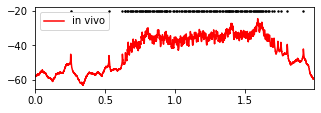

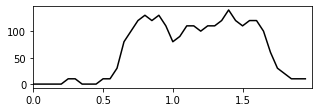

../invivo_results/MBON/a1_oct_pre.csv 0


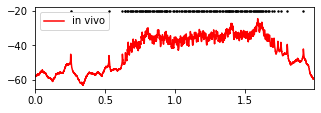

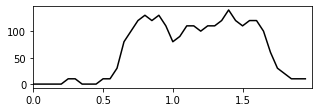

../invivo_results/MBON/a1_oct_pre.csv 1


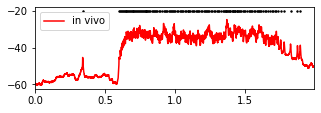

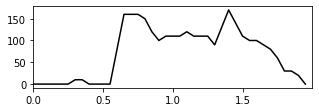

../invivo_results/MBON/a1_oct_pre.csv 2


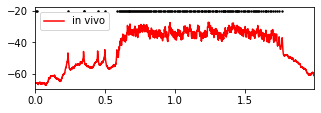

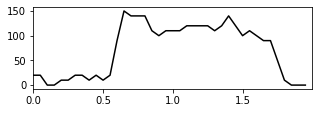

../invivo_results/MBON/a1_oct_pre.csv 3


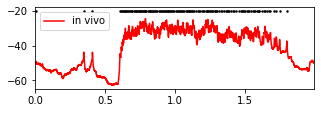

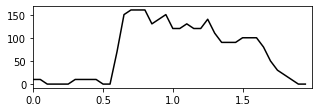

../invivo_results/MBON/a1_oct_pre.csv 4


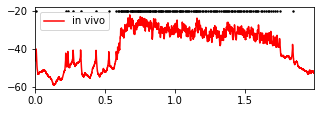

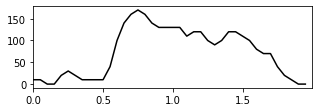

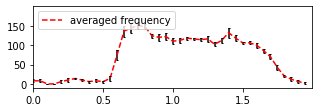

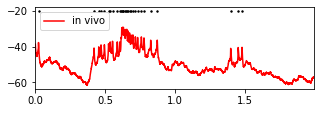

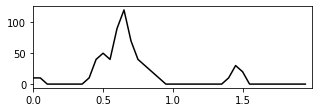

../invivo_results/MBON/a1_oct_post.csv 0


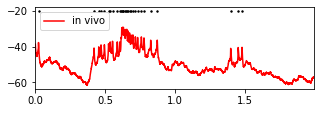

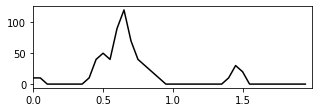

../invivo_results/MBON/a1_oct_post.csv 1


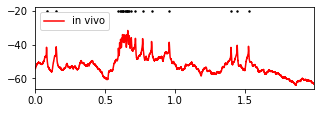

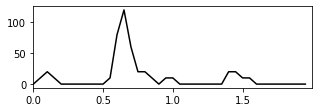

../invivo_results/MBON/a1_oct_post.csv 2


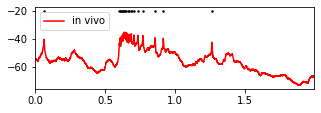

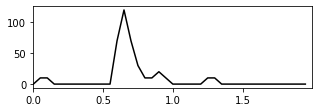

../invivo_results/MBON/a1_oct_post.csv 3


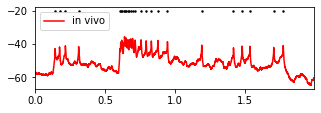

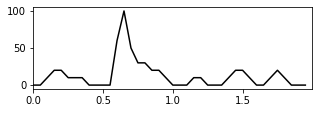

../invivo_results/MBON/a1_oct_post.csv 4


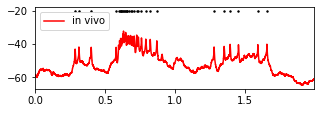

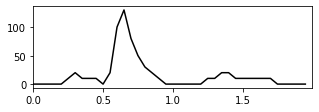

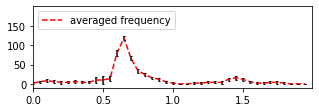

In [7]:
w=50
def print_line_vivo(line,n,filename):
    v0=0
    v1=0
    v2=0
    f0=0
    c0=100
    st0=[]
    line2=[]
    if 1:
        for j,x in enumerate(line):
            vmax=-30
            if j>w/2 and j<len(line)-w/2:
                vmax=-100
                for k in range(w):
                    if line[int(j-w/2+k)]>vmax:
                        vmax=line[int(j-w/2+k)]
            line2.append(vmax)
    if 1:
        for j,x in enumerate(line):
            v2=v1
            v1=v0
            v0=x
            c0=c0-1
            if line2[j]-v0>3:
                c0=50
            if j>0:
                if  v1==line2[j-1] and v2<=v1 and v1>=v0 and ( x>-40 or c0>0):
                    st0.append(j*0.0001)
                    f0=0
                    c0=50
    st1=[]
    plt.figure(figsize=(5,1.5))  
    for j in range(len(st0)):
        st1.append(-20)
    plt.scatter(st0,st1,color="black",s=2)
    plt.plot(np.arange(0,len(line)*0.0001,0.0001),line,color="red",label="in vivo")
    plt.xlim(0,2)
    plt.xticks(np.arange(0, 2, 0.5))
    plt.legend(loc='upper left')
    plt.show()
    plt.figure(figsize=(5,1.5))  
    fx=[]
    fy=[]
    w0=500*0.0001
    for i in range(int(len(line)/w0*0.0001)):
        c0=0
        for t in st0:
            if t>i*w0-w0 and t<i*w0+w0:
                c0+=1
        fx.append(i*w0)
        fy.append(c0*(1/w0/2))
    plt.plot(fx,fy,color="black")
    plt.xlim(0,2)
    plt.xticks(np.arange(0, 2, 0.5))
    plt.show()
    return fx, fy, st0,st1,line

def print_electropysiology(filename,tstart,tend,index,prepost,scale=0, pflag=0):
    dt=0.0001
    n0=pd.read_csv(filename,header=None)
    line=[]
    for j,x in enumerate(n0.T[0]):
        if j>= tstart/dt and j<tend/dt:
            line.append(x)
    fx,fy,st0,st1,line=print_line_vivo(line,0,filename)
    a0=np.zeros((len(n0),len(fy)))
    v_w=[]
    v_w_dot_x=[]
    v_w_dot_y=[]
    for i in range(len(n0)):
        print(filename,i)
        line=[]
        for j,x in enumerate(n0.T[i]):
            if j>= tstart/dt and j<tend/dt:
                line.append(x)
        fx,fy,st0,st1,line=print_line_vivo(line,i,filename)
        a0[i]=np.array(fy)
        if i==index:
            v_w=line
            v_w_dot_x=st0
            v_w_dot_y=st1
        print_txt(line,"../outputs/FigSourceData/Fig5invivo"+prepost+str(i)+".txt")
    print_txt(np.arange(0, 2, 2.0/len(line)),"../outputs/FigSourceData/Fig5invivo"+prepost+"t"+".txt")            
    plt.figure(figsize=(5,1.5))  
    b0=np.zeros(len(a0[0]))
    b1=np.zeros(len(a0[0]))
    for i in range(len(a0[0])):
        for k in range(len(a0)):
            b0[i]+=a0[k][i]/len(a0)
        b1[i]=statistics.stdev(a0.T[i])/math.sqrt(len(a0))
    plt.plot(np.arange(0,(tend-tstart),(tend-tstart)/len(b0)),b0,color="red",linestyle="dashed",label="averaged frequency")
    plt.errorbar(np.arange(0,(tend-tstart),(tend-tstart)/len(b0)),b0, yerr=b1,fmt='none',ecolor='black',capsize=1)
    plt.xlim(0,2)
    plt.ylim(-10,200)
    plt.xticks(np.arange(0, 2, 0.5))
    plt.yticks(np.arange(0, 151, 50))
    plt.legend(loc='upper left')
    plt.show()
    v_f_ave=b0
    v_f_ave_err=b1
    return v_w,v_w_dot_x,v_w_dot_y,v_f_ave,v_f_ave_err
v_pre_w,v_pre_w_dot_x,v_pre_w_dot_y,v_pre_f_ave,v_pre_f_ave_err=print_electropysiology("../invivo_results/MBON/a1_oct_pre.csv",3-0.25,5-0.25,3,"Pre")
v_post_w,v_post_w_dot_x,v_post_w_dot_y,v_post_f_ave,v_post_f_ave_err=print_electropysiology("../invivo_results/MBON/a1_oct_post.csv",3-0.25,5-0.25,3,"Post")

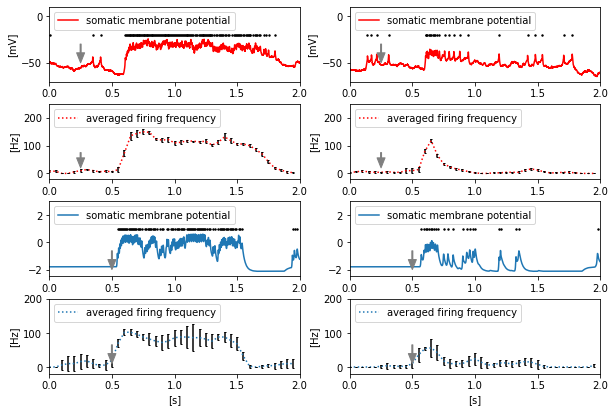

In [8]:
fig = plt.figure(figsize=(9,6))
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95)

ax0 = fig.add_subplot(4,2,1)
ax1 = fig.add_subplot(4,2,2)
ax2 = fig.add_subplot(4,2,3)
ax3 = fig.add_subplot(4,2,4)
ax4 = fig.add_subplot(4,2,5)
ax5 = fig.add_subplot(4,2,6)
ax6 = fig.add_subplot(4,2,7)
ax7 = fig.add_subplot(4,2,8)

x0=np.arange(0,2,2/len(v_pre_w))
x1=np.arange(0,2,2/len(v_pre_f_ave))

ax0.plot(x0,v_pre_w, label="somatic membrane potential",color="red")
ax0.scatter(v_pre_w_dot_x,v_pre_w_dot_y,color="black",s=2)
ax0.set_xticks(np.arange(0, 2.1, 0.5))
ax0.legend(loc='upper left')
ax0.set_xlim(0,2)
ax0.set_ylim(-70,10)
ax0.set_ylabel("[mV]")
ax0.annotate('', xy=(0.25,-50), xytext=(0.25,-30),arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10, connectionstyle='arc3',facecolor='gray', edgecolor='gray'))

ax1.plot(x0,v_post_w, label="somatic membrane potential",color="red")
ax1.scatter(v_post_w_dot_x,v_post_w_dot_y,color="black",s=2)
ax1.set_xticks(np.arange(0, 2.1, 0.5))
ax1.legend(loc='upper left')
ax1.set_xlim(0,2)
ax1.set_ylim(-70,10)
ax1.set_ylabel("[mV]")
ax1.annotate('', xy=(0.25,-50), xytext=(0.25,-30),arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10, connectionstyle='arc3',facecolor='gray', edgecolor='gray'))

ax2.plot(x1,v_pre_f_ave, label="averaged firing frequency",color="red",linestyle="dotted")
ax2.errorbar(x1, v_pre_f_ave, yerr=v_pre_f_ave_err, fmt='none', ecolor='black', capsize=1)
ax2.set_xticks(np.arange(0, 2.1, 0.5))
ax2.legend(loc='upper left')
ax2.set_xlim(0,2)
ax2.set_ylim(-20,250)
ax2.set_ylabel("[Hz]")
ax2.annotate('', xy=(0.25,20), xytext=(0.25,75),arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10, connectionstyle='arc3',facecolor='gray', edgecolor='gray'))

ax3.plot(x1,v_post_f_ave, label="averaged firing frequency",color="red",linestyle="dotted")
ax3.errorbar(x1, v_post_f_ave, yerr=v_post_f_ave_err, fmt='none', ecolor='black', capsize=1)
ax3.set_xticks(np.arange(0, 2.1, 0.5))
ax3.legend(loc='upper left')
ax3.set_xlim(0,2)
ax3.set_ylim(-20,250)
ax3.set_ylabel("[Hz]")
ax3.annotate('', xy=(0.25,20), xytext=(0.25,75),arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10, connectionstyle='arc3',facecolor='gray', edgecolor='gray'))

x0=np.arange(0,2,2/len(m_pre_w))
x1=np.arange(0,2,2/len(m_pre_f_ave))

ax4.plot(x0,m_pre_w, label="somatic membrane potential")
ax4.scatter(m_pre_w_dot_x,m_pre_w_dot_y,color="black",s=2)
ax4.set_xticks(np.arange(0, 2.1, 0.5))
ax4.legend(loc='upper left')
ax4.set_xlim(0,2)
ax4.set_ylim(-2.5,3.0)
ax4.annotate('', xy=(0.5,-2), xytext=(0.5,-2+1.375),arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10, connectionstyle='arc3',facecolor='gray', edgecolor='gray'))

ax5.plot(x0,m_post_w, label="somatic membrane potential")
ax5.scatter(m_post_w_dot_x,m_post_w_dot_y,color="black",s=2)
ax5.set_xticks(np.arange(0, 2.1, 0.5))
ax5.legend(loc='upper left')
ax5.set_xlim(0,2)
ax5.set_ylim(-2.5,3.0)
ax5.annotate('', xy=(0.5,-2), xytext=(0.5,-2+1.375),arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10, connectionstyle='arc3',facecolor='gray', edgecolor='gray'))

ax6.plot(x1,m_pre_f_ave, label="averaged firing frequency",linestyle="dotted")
ax6.errorbar(x1, m_pre_f_ave, yerr=m_pre_f_ave_err, fmt='none', ecolor='black', capsize=1)
ax6.set_xticks(np.arange(0, 2.1, 0.5))
ax6.legend(loc='upper left')
ax6.set_xlim(0,2)
ax6.set_ylim(-20,200)
ax6.set_xlabel("[s]")
ax6.set_ylabel("[Hz]")
ax6.annotate('', xy=(0.5,10), xytext=(0.5,65),arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10, connectionstyle='arc3',facecolor='gray', edgecolor='gray'))

ax7.plot(x1,m_post_f_ave, label="averaged firing frequency",linestyle="dotted")
ax7.errorbar(x1, m_post_f_ave, yerr=m_post_f_ave_err, fmt='none', ecolor='black', capsize=1)
ax7.set_xticks(np.arange(0, 2.1, 0.5))
ax7.legend(loc='upper left')
ax7.set_xlim(0,2)
ax7.set_ylim(-20,200)
ax7.set_xlabel("[s]")
ax7.set_ylabel("[Hz]")
ax7.annotate('', xy=(0.5,10), xytext=(0.5,65),arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10, connectionstyle='arc3',facecolor='gray', edgecolor='gray'))

plt.savefig("../outputs/figs/mbona1.svg", format="svg",dpi=1200)
plt.show()

449.5 451.5 0


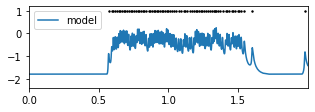

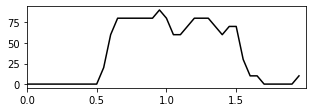

479.5 481.5 1


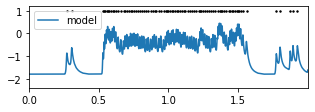

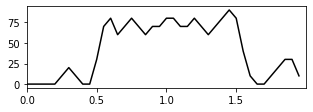

509.5 511.5 2


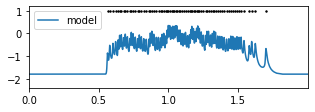

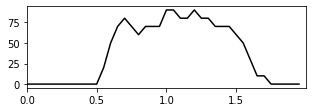

539.5 541.5 3


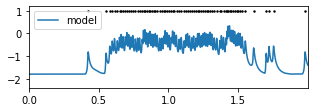

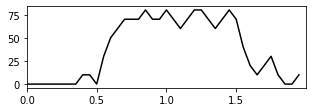

569.5 571.5 4


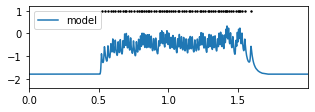

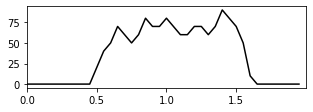

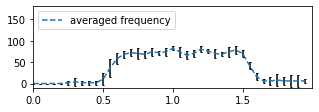

In [9]:
def print_freq_noAPL(start,num,name,index):
    k0=0
    linewidth=2000
    a=np.zeros((num,int(linewidth/w0)))
    m_w=[]
    m_w_dot_x=[]
    m_w_dot_y=[]
    for k in range(num):
        xlim_start=start+k*P*5
        xlim_end=xlim_start+2
        print(xlim_start,xlim_end,k)
        fx, fy, st0,st1,line=print_line(MBONa1_noAPL[int(xlim_start*1000):int(xlim_end*1000)],name,n=k)
        for i in range(int(linewidth/w0)):
            a[k][i]=fy[i]
        if k==index:
            m_w=line
            m_w_dot_x=st0
            m_w_dot_y=st1
        print_txt(line,"../outputs/FigSourceData/Fig5"+name+str(k)+".txt")
    print_txt(np.arange(0, 2, 2.0/len(line)),"../outputs/FigSourceData/Fig5"+name+"t"+".txt")
    plt.figure(figsize=(5,1.5))
    a0=np.zeros(int(linewidth/w0))
    a1=np.zeros(int(linewidth/w0))
    for i in range(int(linewidth/w0)):
        b0=[]
        for k in range(num):
            a0[i]+=a[k][i]/num
        a1[i]=statistics.stdev(a.T[i])
    plt.plot(fx,a0,linestyle="dashed",label="averaged frequency")
    plt.errorbar(fx,a0, yerr=a1,fmt='none',ecolor='black',capsize=1)
    plt.xlim(0,2)
    plt.ylim(-10,180)
    plt.xticks(np.arange(0, 2, 0.5))
    plt.legend(loc='upper left')
    plt.show()
    m_f_ave=a0
    m_f_ave_err=a1
    return m_w,m_w_dot_x,m_w_dot_y,m_f_ave,m_f_ave_err
m_post_w,m_post_w_dot_x,m_post_w_dot_y,m_post_f_ave,m_post_f_ave_err=print_freq_noAPL(homeostasis_duration-0.5+iteration*P*duration,iteration,"insilicoPost_noAPL",0)

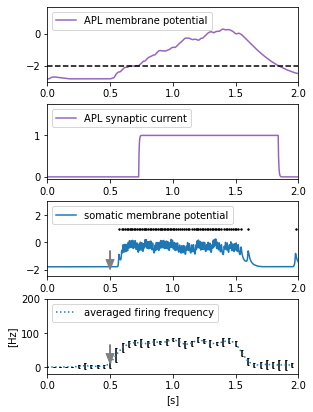

In [12]:
x0=homeostasis_duration-0.5+60
x1=homeostasis_duration+1.5+60
fig = plt.figure(figsize=(4.1,6))
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95)
ax0 = fig.add_subplot(4,1,1)
ax1 = fig.add_subplot(4,1,2)
ax2 = fig.add_subplot(4,1,3)
ax3 = fig.add_subplot(4,1,4)
t0=np.arange(0, 2, 0.001)
ax0.plot(t0,APL_v[int(x0*1000):int(x1*1000)],color="C4",label="APL membrane potential")
ax0.plot([0,2],[-2,-2],color="black",linestyle="dashed")
ax0.set_xlim(0,2)
ax0.set_ylim(-3,1.7)
ax0.legend(loc='upper left')
ax0.set_xticks(np.arange(0, 2.1, 0.5))
ax1.plot(t0,APL_s[int(x0*1000):int(x1*1000)],color="C4",label="APL synaptic current")
ax1.set_xlim(0,2)
ax1.set_ylim(-0.05,1.75)
ax1.legend(loc='upper left')
ax1.set_xticks(np.arange(0, 2.1, 0.5))
print_txt(t0,"../outputs/FigSourceData/Fig5APL_t.txt")
print_txt(APL_v[int(x0*1000):int(x1*1000)],"../outputs/FigSourceData/Fig5APL_v.txt")
print_txt(APL_s[int(x0*1000):int(x1*1000)],"../outputs/FigSourceData/Fig5APL_s.txt")

x0=np.arange(0,2,2/len(m_post_w))
x1=np.arange(0,2,2/len(m_post_f_ave))
ax2.plot(x0,m_post_w, label="somatic membrane potential")
ax2.scatter(m_post_w_dot_x,m_post_w_dot_y,color="black",s=2)
ax2.set_xticks(np.arange(0, 2.1, 0.5))
ax2.legend(loc='upper left')
ax2.set_xlim(0,2)
ax2.set_ylim(-2.5,3.0)
ax2.annotate('', xy=(0.5,-2), xytext=(0.5,-2+1.375),arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10, connectionstyle='arc3',facecolor='gray', edgecolor='gray'))
ax3.plot(x1,m_post_f_ave, label="averaged firing frequency",linestyle="dotted")
ax3.errorbar(x1, m_post_f_ave, yerr=m_post_f_ave_err, fmt='none', ecolor='black', capsize=1)
ax3.set_xticks(np.arange(0, 2.1, 0.5))
ax3.legend(loc='upper left')
ax3.set_xlim(0,2)
ax3.set_ylim(-20,200)
ax3.set_xlabel("[s]")
ax3.set_ylabel("[Hz]")
ax3.annotate('', xy=(0.5,10), xytext=(0.5,65),arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10, connectionstyle='arc3',facecolor='gray', edgecolor='gray'))
plt.savefig("../outputs/figs/mbona1_b.svg", format="svg",dpi=1200)


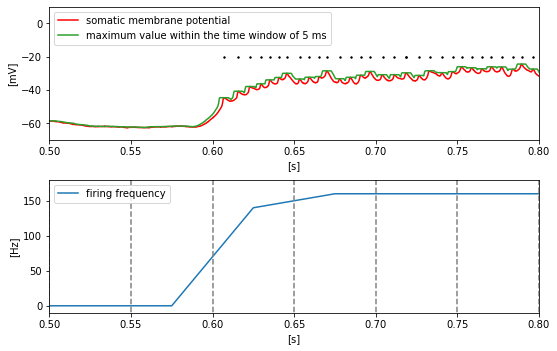

In [11]:
def line_max(l0,w):
    l1=[]
    for i,x in enumerate(l0):
        vmax=-100
        for k in range(w):
            if int(i-w/2+k)>=0 and int(i-w/2+k)<len(l0):
                if l0[int(i-w/2+k)]>vmax:
                    vmax=l0[int(i-w/2+k)]                    
        l1.append(vmax)
    return l1
def calc_freq(d0,w):
    w1=w*0.001
    a0=np.zeros(int(2/w1))
    a1=np.zeros(int(2/w1))
    for d in d0:
        a0[int(d/w1)]+=1
    for i,x in enumerate(a0):
        a1[i]=x/w1
    return a1

fig = plt.figure(figsize=(8,5))
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95)
x0=np.arange(0,2,2/len(v_pre_w))
ax0 = fig.add_subplot(2,1,1)
ax1 = fig.add_subplot(2,1,2)
xstart=0.5
xend=0.8
t0=[i * 0.0001 for i in range(len(v_pre_w))]
at=[]
av=[]
for i,t in enumerate(t0):
    if (t>=xstart and t<xend):
        at.append(t)
        av.append(v_pre_w[i])
ax0.plot(at,av, label="somatic membrane potential",color="red")
ax0.plot(x0,line_max(v_pre_w,50), label="maximum value within the time window of 5 ms",color="C2")
ax0.scatter(v_pre_w_dot_x,v_pre_w_dot_y,color="black",s=2)
ax0.set_xticks(np.arange(0, 2.1, 0.05))
ax0.legend(loc='upper left')
ax0.set_xlim(xstart,xend)
ax0.set_ylim(-70,10)
ax0.set_xlabel("[s]")
ax0.set_ylabel("[mV]")
print_txt(at,"../outputs/FigSourceData/SFig10_t.txt")
print_txt(av,"../outputs/FigSourceData/SFig10_v.txt")

f0=calc_freq(v_pre_w_dot_x,50)
x1=np.arange(0+50*0.001/2,2+50*0.001/2,2/len(f0))
ax1.plot(x1,f0, label="firing frequency",color="C0")
for i in range(int(2/0.05)):
    ax1.plot([0.05*i,0.05*i],[-100,200],color="gray",linestyle="dashed")
ax1.set_xticks(np.arange(0, 2.1, 0.05))
ax1.legend(loc='upper left')
ax1.set_xlim(xstart,xend)
ax1.set_ylim(-10,180)
ax1.set_xlabel("[s]")
ax1.set_ylabel("[Hz]")
plt.savefig("../outputs/figs/Frequency_calculation.svg", format="svg",dpi=1200)
plt.show()
print_txt(f0,"../outputs/FigSourceData/SFig10_f.txt")
